In [36]:
import pandas as pd
import numpy as np
from datetime import datetime
import gc
import os
import re
from collections import Counter
import nltk
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
matplotlib.use("TkAgg")
%matplotlib inline

# import pandas_profiling

target_lang_list = ["norwegian"]

# 각 언어별 처리에 필요한 값들을 데이터프레임 형식으로 작성
lang_data_dict = {
    # 언어 코드
    "code" : {
        "schinese": "zh-cn",
        "english": "en",
        "turkish": "tr",
        "spanish": "es",
        "russian": "ru",
        "koreana": "ko",
        "latam": "la",
        "brazilian": "pt",
        "portuguese": "pt",
        "vietnamese": "vi",
        "polish": "pl",
        "french": "fr",
        "german": "de",
        "hungarian": "hu",
        "ukrainian": "uk",
        "tchinese": "zh-tw",
        "bulgarian": "bg",
        "czech": "cs",
        "italian": "it",
        "thai": "th",
        "greek": "el",
        "dutch": "nl",
        "finnish": "fi",
        "romanian": "ro",
        "japanese": "ja",
        "swedish": "sv",
        "danish": "da",
        "norwegian": "no"
    },
    # 언어 별 폰트
    "font_path" : {
        "schinese": "./font/NotoSansSC-Bold.otf",
        "english": "./font/NotoSans-Bold.ttf",
        "turkish": "./font/NotoSans-Bold.ttf",
        "spanish": "./font/NotoSans-Bold.ttf",
        "russian": "./font/NotoSans-Bold.ttf",
        "koreana": "./font/NotoSansKR-Bold.otf",
        "latam": "./font/NotoSans-Bold.ttf",
        "brazilian": "./font/NotoSans-Bold.ttf",
        "portuguese": "./font/NotoSans-Bold.ttf",
        "vietnamese": "./font/NotoSans-Bold.ttf",
        "polish": "./font/NotoSans-Bold.ttf",
        "french": "./font/NotoSans-Bold.ttf",
        "german": "./font/NotoSans-Bold.ttf",
        "hungarian": "./font/NotoSans-Bold.ttf",
        "ukrainian": "./font/NotoSans-Bold.ttf",
        "tchinese": "./font/NotoSansTC-Bold.otf",
        "bulgarian": "./font/NotoSans-Bold.ttf",
        "czech": "./font/NotoSans-Bold.ttf",
        "italian": "./font/NotoSans-Bold.ttf",
        "thai": "./font/Itim-Regular.ttf",
        "greek": "./font/NotoSans-Bold.ttf",
        "dutch": "./font/NotoSans-Bold.ttf",
        "finnish": "./font/NotoSans-Bold.ttf",
        "romanian": "./font/NotoSans-Bold.ttf",
        "japanese": "./font/NotoSansJP-Bold.otf",
        "swedish": "./font/NotoSans-Bold.ttf",
        "danish": "./font/NotoSans-Bold.ttf",
        "norwegian": "./font/NotoSans-Bold.ttf"
    }, "code" : {
        "schinese": "zh-cn",
        "english": "en",
        "turkish": "tr",
        "spanish": "es",
        "russian": "ru",
        "koreana": "ko",
        "latam": "la",
        "brazilian": "pt",
        "portuguese": "pt",
        "vietnamese": "vi",
        "polish": "pl",
        "french": "fr",
        "german": "de",
        "hungarian": "hu",
        "ukrainian": "uk",
        "tchinese": "zh-tw",
        "bulgarian": "bg",
        "czech": "cs",
        "italian": "it",
        "thai": "th",
        "greek": "el",
        "dutch": "nl",
        "finnish": "fi",
        "romanian": "ro",
        "japanese": "ja",
        "swedish": "sv",
        "danish": "da",
        "norwegian": "no"
    }, "pattern": {
        "schinese": r"",
        "english": r"[\u0041-\u005A\u0061-\u007A]",
        "turkish": r"",
        "spanish": r"",
        "russian": r"",
        "koreana": r"[\uAC00-\uD7AF\u1100-\u11FF]+",
        "latam": r"",
        "brazilian": r"",
        "portuguese": r"",
        "vietnamese": r"",
        "polish": r"",
        "french": r"",
        "german": r"",
        "hungarian": r"",
        "ukrainian": r"",
        "tchinese": r"",
        "bulgarian": r"",
        "czech": r"",
        "italian": r"",
        "thai": r"[\u0E00-\u0E7F]+",
        "greek": r"",
        "dutch": r"",
        "finnish": r"[\u0041-\u005A\u0061-\u007A\u00C5\u00C4\u00D6\u00E5\u00E4\u00F6]",
        "romanian": r"",
        "japanese": r"[\u3040-\u309F\u30A0-\u30FF\u31F0-\u31FF\u4E00-\u9FD5]",
        "swedish": r"[\u0041-\u005A\u0061-\u007A]",
        #"swedish": r"[\u0041-\u005A\u0061-\u007A\u00C5\u00C4\u00D6\u00E5\u00E4\u00F6]",
        "danish": r"",
        "norwegian": r"[\u0041-\u005A\u0061-\u007A\u00C6\u00E6\u00C5\u00E5\u00E5\u00F8\u00D8]"
    }
}

# 원하는 값을 닷 연산자로 직관적으로 접근하기 위한 데이터프레임 생성
lang_data = pd.DataFrame([], columns=lang_data_dict.keys(), index=target_lang_list)

for lang in lang_data.index:
    lang_data.loc[lang] = [lang_data_dict[column][lang] for column in lang_data.columns]

display(lang_data)

,code,font_path,pattern
norwegian,no,./font/NotoSans-Bold.ttf,[\u0041-\u005A\u0061-\u007A\u00C6\u00E6\u00C5\...


In [4]:
from nltk.corpus import stopwords
stopwords.words("norwegian")[:10]

['og', 'i', 'jeg', 'det', 'at', 'en', 'et', 'den', 'til', 'er']

In [25]:
df = pd.read_csv("./review/norwegian.csv", encoding = "utf-8-sig")

display(df)

,app_id,app_name,recommendationid,language,review,voted_up,timestamp_created
0,292030,The Witcher 3: Wild Hunt,84694052,norwegian,"amazing, nothing less. its just amazing and a ...",True,1610661126
1,292030,The Witcher 3: Wild Hunt,83929749,norwegian,gg,True,1609701813
2,292030,The Witcher 3: Wild Hunt,83872441,norwegian,yes,True,1609645299
3,292030,The Witcher 3: Wild Hunt,83722216,norwegian,Meget bra spill! har det nå på 3 plattformer o...,True,1609501581
4,292030,The Witcher 3: Wild Hunt,83645314,norwegian,One of the best games i've every played.\nEasi...,True,1609416019
...,...,...,...,...,...,...,...
53452,9900,Star Trek Online,12245181,norwegian,tror ikke det virker før enkjøper no ... last...,False,1411735086
53453,9900,Star Trek Online,12015106,norwegian,jepp mye bedre en de var når det kom ut og er ...,True,1410108208
53454,9900,Star Trek Online,11921073,norwegian,NOPE NOPE NOPE\n,False,1409404470
53455,99910,Puzzle Pirates,97127010,norwegian,Quite shitty,False,1628364719


In [26]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
tokenizer = TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()

test_df = df.copy()
display(test_df)

def preprocess_norwegian(review):
    review = str(review)
    review = review.lower()
    
    trash = re.compile(r"[\u0021-\u0039]")
    review = trash.sub("", review)

    stop_swe = set(stopwords.words("norwegian"))
    stop_eng = set(stopwords.words("english"))

    token_list = tokenizer.tokenize(review)

    #print(token_list)

    tokens = []
    for token in token_list:
        token = "".join(re.findall(lang_data.pattern.norwegian, token))
        #print(token)
        tokens.append(token)
        
    
    result = []

    for w in tokens:
        if w not in stop_swe and w not in stop_eng:
            result.append(w)
        
    #result = [lm.lemmatize(w, pos="v") for w in result]

    tagged_list = pos_tag(result)
    
    #print(tagged_list)

    nouns_list = [t[0] for t in tagged_list if t[1] == "NN" or t[1] == "NNS" or t[1] == "VBG"]
    
    if nouns_list:
        return " ".join(nouns_list)
    else:
        return np.nan
 

test_df["review"] = test_df[["review"]].apply(
    lambda x: preprocess_norwegian(x["review"]), axis=1
)

# 필터링 결과가 결측치인 행 제거
test_df = test_df.dropna(axis=0, how="any")

display(test_df)

,app_id,app_name,recommendationid,language,review,voted_up,timestamp_created
0,292030,The Witcher 3: Wild Hunt,84694052,norwegian,"amazing, nothing less. its just amazing and a ...",True,1610661126
1,292030,The Witcher 3: Wild Hunt,83929749,norwegian,gg,True,1609701813
2,292030,The Witcher 3: Wild Hunt,83872441,norwegian,yes,True,1609645299
3,292030,The Witcher 3: Wild Hunt,83722216,norwegian,Meget bra spill! har det nå på 3 plattformer o...,True,1609501581
4,292030,The Witcher 3: Wild Hunt,83645314,norwegian,One of the best games i've every played.\nEasi...,True,1609416019
...,...,...,...,...,...,...,...
53452,9900,Star Trek Online,12245181,norwegian,tror ikke det virker før enkjøper no ... last...,False,1411735086
53453,9900,Star Trek Online,12015106,norwegian,jepp mye bedre en de var når det kom ut og er ...,True,1410108208
53454,9900,Star Trek Online,11921073,norwegian,NOPE NOPE NOPE\n,False,1409404470
53455,99910,Puzzle Pirates,97127010,norwegian,Quite shitty,False,1628364719


,app_id,app_name,recommendationid,language,review,voted_up,timestamp_created
0,292030,The Witcher 3: Wild Hunt,84694052,norwegian,amazing nothing game hunt game remeber dlcs ga...,True,1610661126
1,292030,The Witcher 3: Wild Hunt,83929749,norwegian,gg,True,1609701813
2,292030,The Witcher 3: Wild Hunt,83872441,norwegian,yes,True,1609645299
3,292030,The Witcher 3: Wild Hunt,83722216,norwegian,bra spill lei,True,1609501581
4,292030,The Witcher 3: Wild Hunt,83645314,norwegian,games elder scrolls series,True,1609416019
...,...,...,...,...,...,...,...
53451,9900,Star Trek Online,12500231,norwegian,nope dont wtf end plizzz,False,1413385593
53452,9900,Star Trek Online,12245181,norwegian,tror virker kødd ikk fått spillt ga,False,1411735086
53453,9900,Star Trek Online,12015106,norwegian,jepp mye bedre minst holdt play spill langt,True,1410108208
53454,9900,Star Trek Online,11921073,norwegian,nope nope nope,False,1409404470


In [30]:
nor_text = " ".join(test_df["review"].tolist())
nor_text_counter = Counter(nor_text.split(" "))

display(nor_text_counter.most_common(20))

[('game', 24723),
 ('fun', 4579),
 ('', 4449),
 ('bra', 4206),
 ('spill', 3912),
 ('play', 2216),
 ('spillet', 2020),
 ('games', 1971),
 ('time', 1880),
 ('veldig', 1685),
 ('love', 1388),
 ('hours', 1336),
 ('friends', 1191),
 ('story', 1180),
 ('playing', 994),
 ('dont', 915),
 ('yes', 871),
 ('gøy', 824),
 ('people', 802),
 ('way', 739)]

In [34]:
stopword_list = ["", "game", "bra", "games", "spill", "veldig", "dont", "yes", "get"]

for stopword in stopword_list:
    if stopword in nor_text_counter.keys():
        del nor_text_counter[stopword]
        
display(nor_text_counter.most_common(20))

[('fun', 4579),
 ('play', 2216),
 ('spillet', 2020),
 ('time', 1880),
 ('love', 1388),
 ('hours', 1336),
 ('friends', 1191),
 ('story', 1180),
 ('playing', 994),
 ('gøy', 824),
 ('people', 802),
 ('way', 739),
 ('graphics', 735),
 ('bugs', 705),
 ('amazing', 696),
 ('money', 688),
 ('lot', 648),
 ('gameplay', 630),
 ('spille', 614),
 ('mods', 596)]

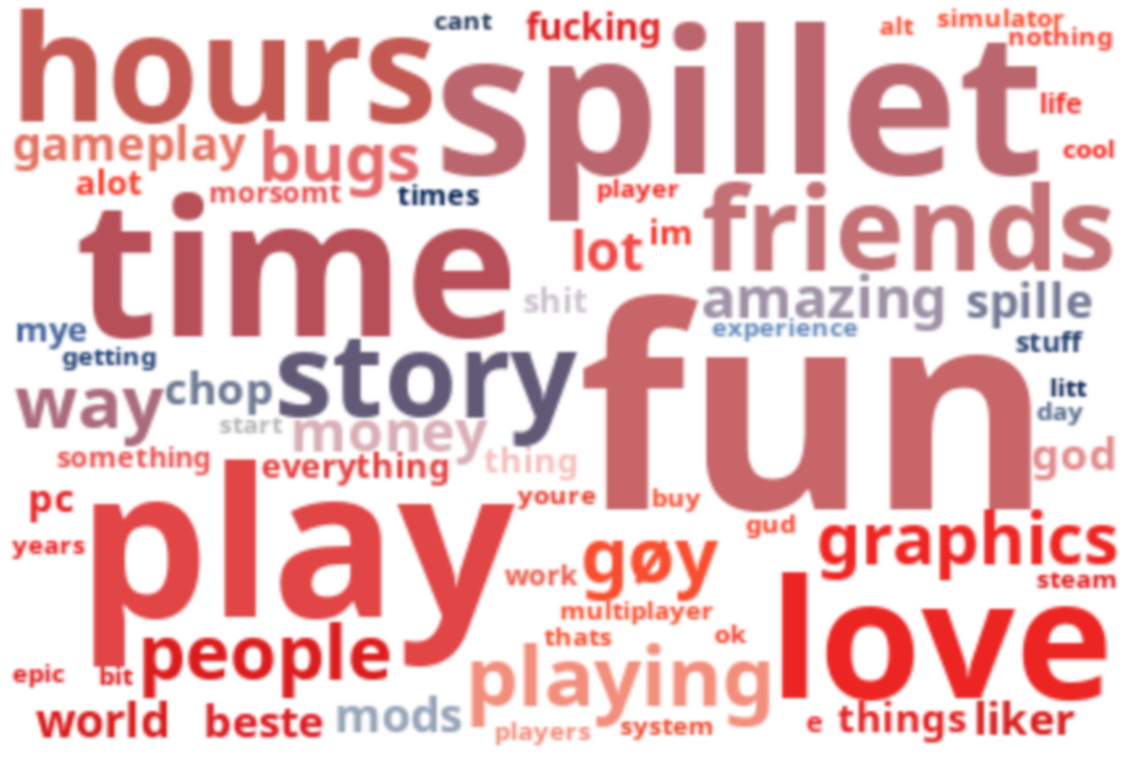

In [35]:
flag = Image.open(f"norwegian.png")
mask = np.array(flag)

wc = WordCloud(font_path=lang_data.font_path.norwegian, prefer_horizontal=1.0,
               background_color="rgb(255,255,255)", mask=mask, color_func=ImageColorGenerator(mask),
               min_font_size = 10,
               max_words=200, width=2560, height=1707).generate_from_frequencies(nor_text_counter) 

plt.figure(figsize=(20,20))

plt.imshow(wc, interpolation="bicubic")
plt.axis("off")
plt.show()